In [4]:
# -*- coding: utf-8 -*-
# importing libraries

# Author
# Fabrizio Falasca (fabrifalasca@gmail.com)

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
import numpy as np
import netCDF4
from netCDF4 import Dataset
from utils_entropy import *

In [2]:
# Entropy from microstates using the maximum entropy principle
# See here https://aip.scitation.org/doi/pdf/10.1063/1.5125921

## Test with the Logistic map

In [2]:
# Test using the Logistic Map
# Function (Logistic Map function)
#
def logMap(r,x0,n):
    '''
    Returns a time series of length n using the logistic map
        x_(n+1) = r*x_n(1-x_n) at parameter r and using the initial condition x0
    '''
    y = np.zeros(n+1)
    y[0] = x0
    for i in range(n):
        y[i+1] = r * y[i] * (1 - y[i])

    return y

In [3]:
# Maximum Lyapunov exponent
# input: ts is a time series generated from the logistic map
def lyapunov_exp(ts,r): return np.sum(np.log(np.abs(r - 2*r*ts)))/len(ts)

In [5]:
n = 4
# Sample size used to find epsilon
sampleSize_h = 1000
# Sample size to compute the final entropy
sampleSize = 10000
# Initialize the entropy
entropy = np.array([], float)
for i in np.arange(3.50,4.0001,0.001):    

    #  Parameters of logistic map
    r = i  # Bifurcation parameter
    x0 = 0.6   # Initial value
    #  Length of the time series
    length = 2000

    #  Create a time series using the logistic map
    ts_with_transient = logMap(r,x0,length) # Initial transient still has to be removed
    ts = ts_with_transient[1001:] # Transient removed (transient considered as the first 1000 points)
    
    entropy = np.append(entropy,s_max(ts, n, sampleSize_h, sampleSize))

In [6]:
# Lyapunov exponent
lyap_exp = np.array([],float)

for i in np.arange(3.50,4.0001,0.001):
    
    #  Parameters of logistic map
    r = i  # Bifurcation parameter
    x0 = 0.6   # Initial value
    #  Length of the time series
    length = 2000

    #  Create a time series using the logistic map
    time_seriesWithT = logMap(r,x0,length) # Initial transient still has to be removed
    time_series = time_seriesWithT[1001:] # Transient removed (transient considered as the first 1000 points)
    
    lyap_exp = np.append(lyap_exp,lyapunov_exp(time_series,r))

In [ ]:
#np.savetxt('max_s.txt',entropy_max, fmt = '%1.6f')

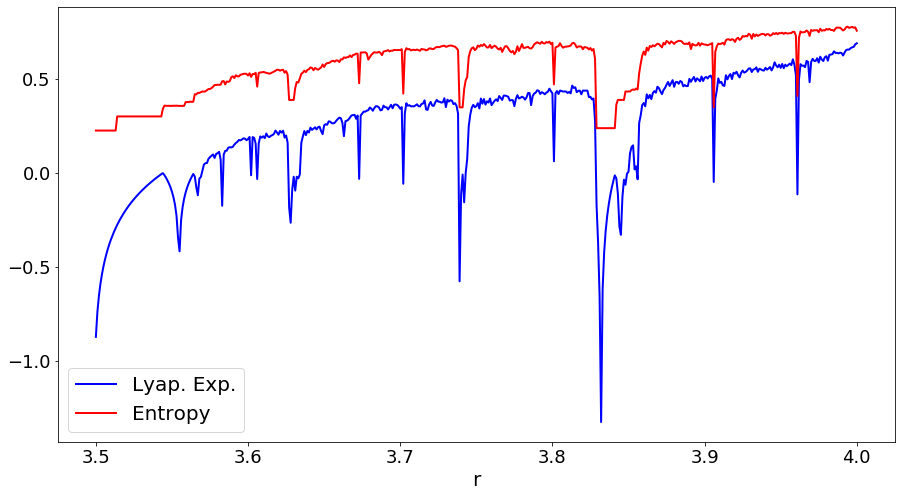

In [8]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(3.50,4.0001,0.001),lyap_exp,"-b",label="Lyap. Exp.",linewidth = 2)
plt.plot(np.arange(3.50,4.0001,0.001),entropy,"-r",label="Entropy",linewidth = 2)
plt.xlabel('r',fontsize = 20)
plt.ylabel('')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc="lower left",fontsize = 20)
plt.show()
#fig.savefig('Entropy_LogMap',bbox_inches='tight')

## Main observation

The entropy of the system is a clear indicator of changes in complexity of the asyntotic dynamics as r changes.

Note: 

(a) Methods from nonlinear time series analysis usually require to embed the time series in a higher  dimensional space, a procedure known as “state space reconstruction" (see F. Takens, (Springer, Berlin, 1981), pp. 366–381). The entropy quantifiers proposed by Corso et al. (2018) and, more recently, by Prado et al. (2019) have been show to perform qualitatively well even without state space reconstruction.
This is a clear advantage when dealing with spatiotemporal datasets, where one needs to compute the entropy of thousands of time series. In fact state space reconstruction is a delicate procedure as it could lead sometimes to false result (see N. Marwan, Int. J. Bifurc. Chaos (2011)). 

(b) The entropy quantifier explored here is based on the "maximum entropy principle". As the computation of a recurrence plot depends on the epsilon threshold, so does its recurrence-based entropy. Prado et al. (2019) proposed a useful heuristic to compute the entropy. The heuristic works as follows: for a given time series, (i) compute the recurrence-based entropy using a range of values for epsilon, (ii) peak the maximum entropy value.

They showed that the maximum entropy is what correlates best with the Lyapunov exponent of the system.

The maximum entropy quantifier depends also on other 2 parameters: (i) the size of the microstates to be sampled in the recurrence plot and (ii) the sample size.
The size of the microstate used here is n = 4 as shown to be an optimal size in Corso et al. (2018).

Moreover, during different experiments with "real-world" time series of length ~1000 data points we observed that while the entropy converge after 10000 random samples the entropy dependence on epsilon stays almost the same from a random sample of 1000 microstates.

Here we leverage observation and compute the maximum entropy by (i) first exploring the dependence of the epsilon parameter sampling 1000 microstates, (ii) choosing the epsilon based on that calculation and (iii) compute the final value of entropy using a sample of size 10000 for which we know we achieve convergence.
While this may be not the otpimal thing to do with ~10^3 time series, it becomes very useful with spatiotemporal datasets of ~10^4 or ~10^5 time series.

We show an example below using a time series randomly peaked in the tropical pacific and simulated by general circulation model (GCM).

- The entropy converges at a sample of 10000 microstates (i.e., no difference with the 15000 microstates).
- The dependence of the entropy on epsilon does not change significantly using 1000 or 10000 microstates. We leverage this observation to speed up our computations.

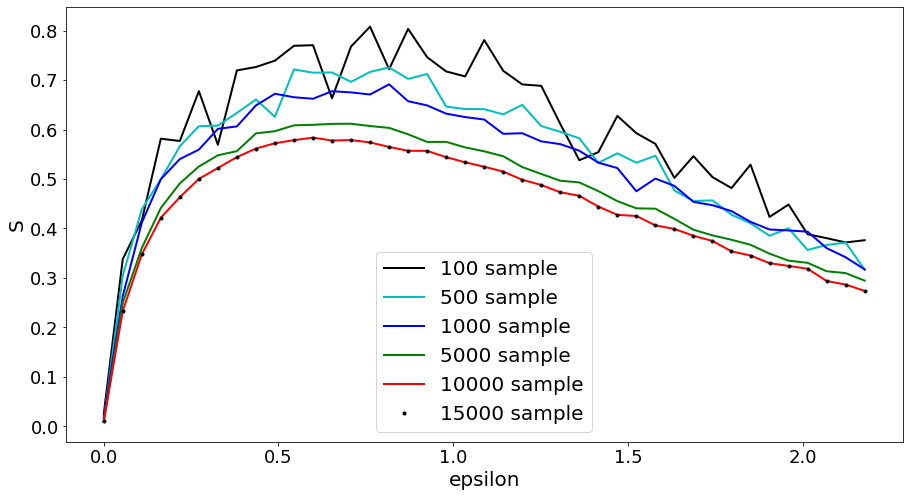

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [22]:
fig = plt.figure(figsize=(15,8))
plt.plot(epsilons,entropy_ts_100,"-k",label="100 sample",linewidth = 2)
plt.plot(epsilons,entropy_ts_500,"-c",label="500 sample",linewidth = 2)
plt.plot(epsilons,entropy_ts_1000,"-b",label="1000 sample",linewidth = 2)
plt.plot(epsilons,entropy_ts_5000,"-g",label="5000 sample",linewidth = 2)
plt.plot(epsilons,entropy_ts_10000,"-r",label="10000 sample",linewidth = 2)
plt.plot(epsilons,entropy_ts_10000,".k",label="15000 sample",linewidth = 2)
plt.xlabel('epsilon',fontsize = 20)
plt.ylabel('S',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc="lower center",fontsize = 20)
plt.show()
#fig.savefig('Different_samples_ts.eps',bbox_inches='tight')